#  Principal Component Analysis
## This notebook outlines the main concepts behind the Principal Components Analysis Machine Learning Algorithm

PCA is fundamentally a dimensionality reduction algorithm.
- visualization tool
- noise filtering
- feature extraction

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible **unsupervised** method for **dimensionality reduction**

### Consider the following 200 points

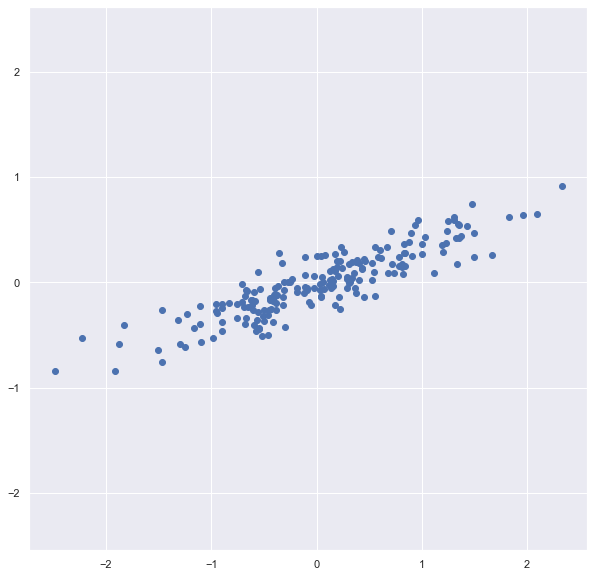

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Problem: Rather than attempting to **predict** the y values from the x values, the unsupervised learning problem attempts to learn about the **relationship** between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the **principal axes** in the data, and using those axes to describe the dataset.

Let's see how to use it in Scikit-learn.

### PCA Estimator
- Import the estimator
- Build the estimator object with hyperparameters
- Fit the model

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data called attributes
- "components" 
- "explained variance"

In [7]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [8]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Let's visualize them as vectors over the input data
- **components** define the direction of the vector
- **explained variance** define the squared-length of the vector

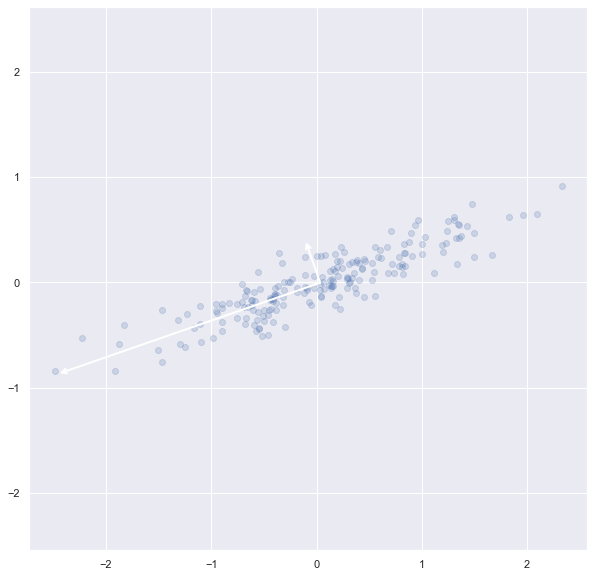

In [9]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

**Principal axes**

- length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more
- it is a measure of the variance of the data when projected onto that axis

The projection of each data point onto the principal axes are the "principal components" of the data.

**Principal Components**

![Principal Components](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/Principal_Components.png)

This transformation from data axes to principal axes is an **affine transformation**, which basically means it is composed of a translation, rotation, and uniform scaling.

### PCA as dimensionality reduction

- Zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance

### Scikit-learn PCA Dimension reduction
- Import the PCA estimator
- Build the PCA estimator with number of componetns
- Fit the model on data points
- Transform the data points with the trained model

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)

### Check the transformed data

In [11]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a **single dimension**
- Perform the inverse transform of this reduced data and plot it along with the original data

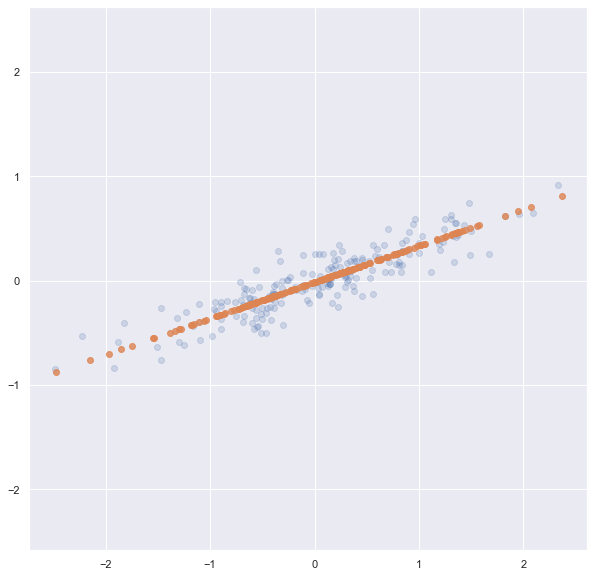

In [12]:
X_new = pca.inverse_transform(X_pca)
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

- Original data : light blue points
- Projected data : Orange dark points

This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

# PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consists of 8×8 pixel images, meaning that they are **64-dimensional**.

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two-dimensions

### Build a PCA model with 2 components

In [16]:
pca = PCA(2)  # project from 64 to 2 dimensions

### Transform the data with the built PCA model

In [17]:
projected = pca.fit_transform(digits.data)

### Check if the dimensions are reduced

In [18]:
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


### Plot the first two principal components

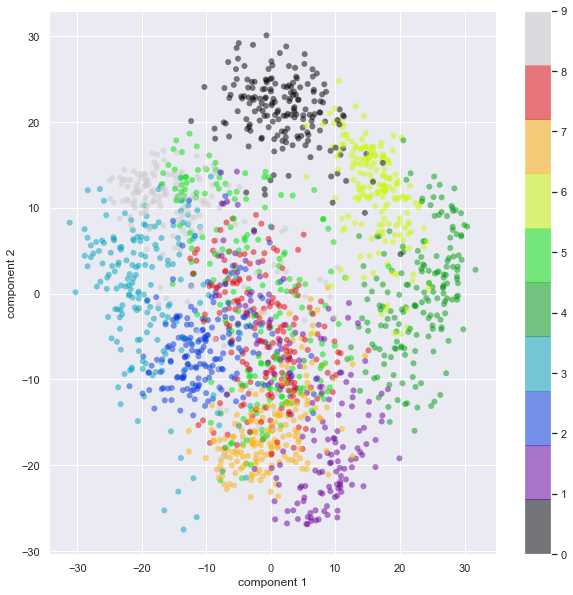

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Theory: What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

#### PCA Pixel Basis Reconstruction using only 8 pixels

![PCA Pixel Basis](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/PCA_pixel_basis.png)

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions

#### PCA Bais Reconstruction using the first 8 Principal components

![PCA Basis](https://raw.githubusercontent.com/subashgandyer/datasets/main/images/PCA_PCA_basis.png)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to **estimate how many components** are needed to describe the data.

This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components

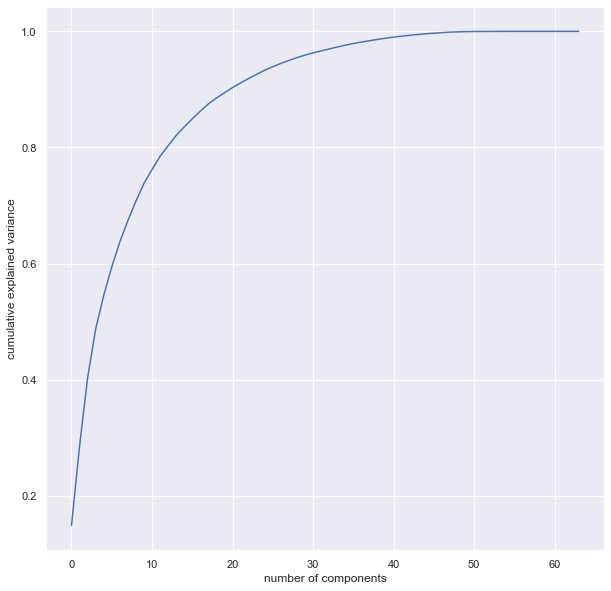

In [22]:
pca = PCA().fit(digits.data)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.

For example, we see that with the digits the first **10 components** contain approximately **75% of the variance**, while you need around **50 components** to describe close to **100% of the variance**.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about **20 components** to retain **90% of the variance**.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

# PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.

Any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.

So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

#### Plot some sample digits data

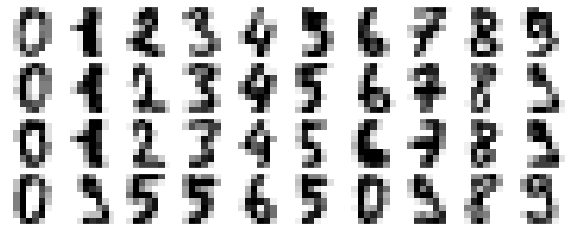

In [23]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

#### Add some random noise to create a noisy dataset, and re-plot it

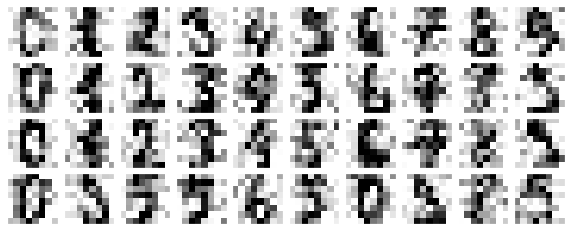

In [24]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.

#### Train a PCA on the noisy data, requesting that the projection preserve 50% of the variance

In [25]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

Here **50% of the variance** amounts to **12 principal components**.

#### Use the inverse of the transform to reconstruct the filtered digits

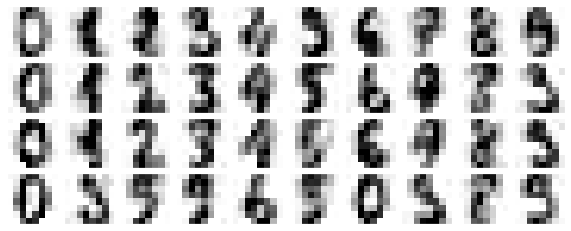

In [26]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead **train the classifier on the lower-dimensional representation**, which will automatically serve to filter out random noise in the inputs.

## Summary

Given any high-dimensional dataset
- Visualize the relationship between points 
- Understand the main variance in the data 
- Understand the intrinsic dimensionality 

Cons
- Affected by outliers in the data